In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

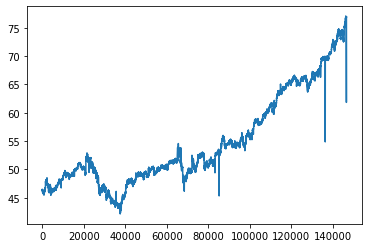

In [2]:
folder = os.listdir("C:/Users/natha/Downloads/S&Ptest/")
df = pd.read_csv("C:/Users/natha/Downloads/S&Ptest/" + folder[0] + "/" + "table_aapl.csv")
df = df.iloc[:,:7]
df.columns = ['Date','Time','Open','High','Low','Close','Volume']
for i in folder[1:]:
    df1 = pd.read_csv("C:/Users/natha/Downloads/S&Ptest/" + i + "/" + "table_aapl.csv")
    df1 = df1.iloc[:,:7]
    df1.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    df = pd.concat([df, df1], axis = 0, ignore_index = True)
df.fillna(value = df.mean(), inplace = True)
y = df.Close.values
x = df.index
fig, ax = plt.subplots()
ax.plot(x, y)
df.reset_index(inplace = True)

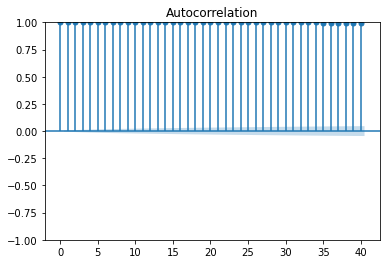

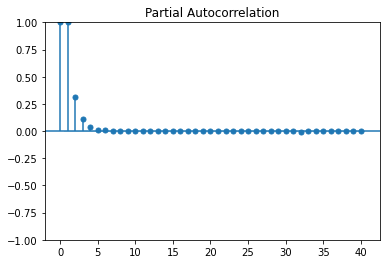

,index,Date,Time,Open,High,Low,Close,Volume,Change
1,1,20190319,702,46.3844,46.4040,46.3844,46.3844,89.5474,-0.0196
2,2,20190319,703,46.3844,46.4040,46.3844,46.4040,1815.3700,0.0196
3,3,20190319,705,46.4040,46.4040,46.3844,46.3844,468.0890,-0.0196
4,4,20190319,706,46.3967,46.3967,46.3967,46.3967,1648.4900,0.0123
5,5,20190319,707,46.4040,46.4163,46.3967,46.4089,4457.0200,0.0122
...,...,...,...,...,...,...,...,...,...
146589,146589,20200109,1749,76.8980,76.9104,76.8980,76.9104,1393.4400,0.0100
146590,146590,20200109,1750,76.9104,76.9104,76.9104,76.9104,1647.1600,0.0000
146591,146591,20200109,1751,76.9129,76.9129,76.8880,76.9129,942.3850,0.0025
146592,146592,20200109,1752,76.9129,76.9129,76.9129,76.9129,40.2729,0.0000


In [3]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df.Close.values.squeeze(), lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(df.Close.values.squeeze(), lags=40, method="ywm")
plt.show()

df['Change'] = df.Close.diff(periods=1)
df = df[1:]
df

<AxesSubplot:>

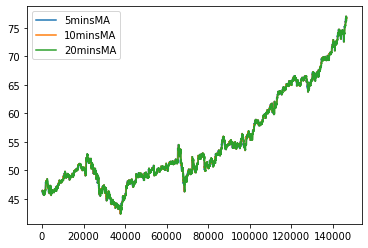

In [4]:
def moving_average(DataFrame, window_size):
  numbers = DataFrame.High
  i=0
  moving_averages = []
  while i < len(numbers) - window_size + 1:
      this_window = numbers[i : i + window_size]
      window_average = sum(this_window) / window_size
      moving_averages.append(window_average)
      i += 1
  return moving_averages

fiveMA = pd.Series(moving_average(df, 5), name="5minsMA")
tenMA = pd.Series(moving_average(df, 10), name="10minsMA")
twentyMA = pd.Series(moving_average(df, 20), name="20minsMA")
df = pd.concat([df, fiveMA, tenMA, twentyMA], axis=1)
df['5minsMA'] = df['5minsMA'].shift(50)
df['10minsMA'] = df['5minsMA'].shift(100)
df['20minsMA'] = df['5minsMA'].shift(200)
df = df[:-1]
df[['5minsMA','10minsMA','20minsMA']].plot()

In [5]:
lag_features = ["Close"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.dropna(inplace= True)
df

,index,Date,Time,Open,High,Low,Close,Volume,Change,5minsMA,10minsMA,20minsMA,Close_mean_lag3,Close_mean_lag7,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30
251,251.0,20190319.0,1121.0,46.0674,46.0846,46.0478,46.0478,219159.0000,-0.0196,46.09646,46.41632,46.40598,46.051868,46.051643,46.014942,0.013952,0.012194,0.044086
252,252.0,20190319.0,1122.0,46.0507,46.0751,46.0500,46.0748,123421.0000,0.0270,46.09448,46.41582,46.40942,46.063332,46.056557,46.017075,0.013952,0.013742,0.045408
253,253.0,20190319.0,1123.0,46.0763,46.0871,46.0674,46.0822,101421.0000,0.0074,46.09300,46.41484,46.41336,46.068268,46.059715,46.017647,0.018107,0.016873,0.046137
254,254.0,20190319.0,1124.0,46.0846,46.0994,46.0773,46.0846,218032.0000,0.0024,46.09104,46.41434,46.41826,46.080532,46.062515,46.017647,0.005108,0.019342,0.046137
255,255.0,20190319.0,1125.0,46.0834,46.1117,46.0822,46.0969,217087.0000,0.0123,46.07776,46.41462,46.41924,46.087898,46.070587,46.018867,0.007886,0.020339,0.047759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146588,146588.0,20200109.0,1748.0,76.9104,76.9129,76.9004,76.9004,3362.7800,-0.0100,76.91240,76.64814,76.84978,76.900436,76.908585,76.907143,0.009950,0.011717,0.008194
146589,146589.0,20200109.0,1749.0,76.8980,76.9104,76.8980,76.9104,1393.4400,0.0100,76.91240,76.63672,76.85872,76.907066,76.907173,76.907059,0.005774,0.010613,0.008146
146590,146590.0,20200109.0,1750.0,76.9104,76.9104,76.9104,76.9104,1647.1600,0.0000,76.91290,76.62878,76.86666,76.907066,76.906113,76.906647,0.005774,0.009708,0.007617
146591,146591.0,20200109.0,1751.0,76.9129,76.9129,76.8880,76.9129,942.3850,0.0025,76.90992,76.62928,76.87858,76.911232,76.905060,76.907066,0.001443,0.008190,0.007606


In [6]:
def adfuller_test(price):
    result = sm.tsa.stattools.adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Close'])

ADF Test Statistic : 1.4463334535390826
p-value : 0.9973147901094117
#Lags Used : 10
Number of Observations Used : 146331
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


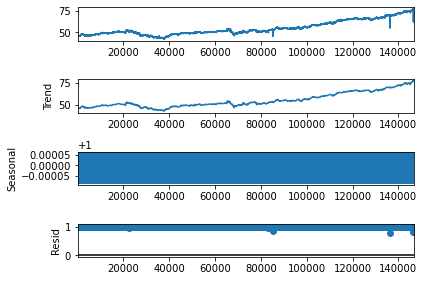

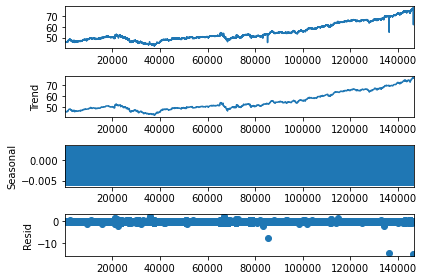

In [7]:
y = df['Close'].to_frame()

result_mul = sm.tsa.seasonal_decompose(y, model='multiplicative',period = 52)
result_add = sm.tsa.seasonal_decompose(y, model='additive',period = 52)

result_mul.plot()
result_add.plot()
plt.show()

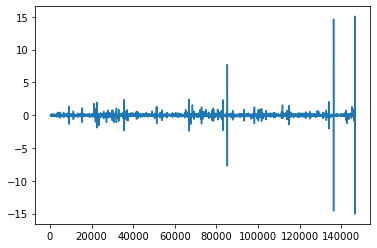

In [9]:
x = df.index
y = df['Change']

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [11]:
import pmdarima
df_train = df[df.index < (0.8* len(df.index))]
df_valid = df[df.index >= (0.8* len(df.index))]
features = ['Close_mean_lag3', 'Close_mean_lag7', 'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7', 'Close_std_lag30']
np.any(np.isnan(df_train))
np.any(np.isnan(df_valid))
np.all(np.isfinite(df_train))
np.all(np.isfinite(df_valid))


model = pmdarima.auto_arima(df_train.Close, exogenous = df_train[features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close, exogenous = df_train[features])

forecast = model.predict(n_periods=len(df_valid), exogenous = df_valid[features])
df_valid["ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-476546.101, Time=94.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-459654.330, Time=50.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-459707.733, Time=58.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-459693.981, Time=74.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-459656.276, Time=136.92 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-476854.717, Time=88.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-475541.244, Time=80.43 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-459598.938, Time=77.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-476799.890, Time=94.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-476724.838, Time=82.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-472936.252, Time=81.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-476749.775, Time=97.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-476856.915, Time=97.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-475

C:\Users\natha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\natha\AppData\Local\Temp\ipykernel_54048\587034232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["ARIMAX"] = forecast


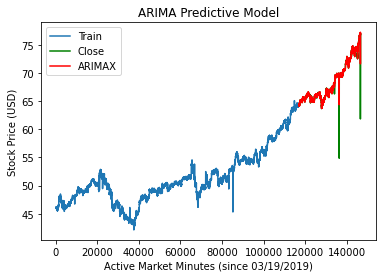

RMSE: 0.10289075296037485
MAE: 0.01401867607260617
MAPE: 0.00020556234252446404


In [24]:
trainIndex = df_train.index
train = df_train["Close"]
testIndex = df_valid.index
real = df_valid["Close"]
predict = df_valid["ARIMAX"]

plt.plot(trainIndex, train, label = "Train")
plt.plot(testIndex, real, label = "Close", color = "green")
plt.plot(testIndex, predict, label = "ARIMAX", color = "red")
plt.legend()
plt.xlabel('Active Market Minutes (since 03/19/2019)')
plt.ylabel('Stock Price (USD)')
plt.title("ARIMA Predictive Model")
plt.show()

import sklearn.metrics
print("RMSE:", np.sqrt(sklearn.metrics.mean_squared_error(df_valid.Close, df_valid.ARIMAX)))
print("MAE:", sklearn.metrics.mean_absolute_error(df_valid.Close, df_valid.ARIMAX))
print("MAPE:", sklearn.metrics.mean_absolute_percentage_error(df_valid.Close, df_valid.ARIMAX))